<a href="https://colab.research.google.com/github/ElizavetaNosova/CompLing_homeworks/blob/master/Topic_model_BigARTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!pip install protobuf tqdm wheel

In [0]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [0]:
cd bigartm

/content/bigartm/build/bigartm


In [0]:
mkdir build

In [0]:
cd build

/content/bigartm/build/bigartm/build


In [0]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [0]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [0]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl
  Found existing installation: bigartm 0.10.0
    Uninstalling bigartm-0.10.0:
      Successfully uninstalled bigartm-0.10.0


In [0]:
!pip install pymorphy2

In [0]:
%matplotlib inline
import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize

In [0]:
nltk.download('punkt');nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:

stops = set(stopwords.words('russian')) | {'gt',}
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word.replace(':', ''))[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stops]
        norm_texts.append(norm_words)
        
    return norm_texts

def tokenize(text):
    words = [word.strip(string.punctuation) for word in text.split()]
    words = [word for word in words if word]
    
    return words

In [0]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-08 20:36:49--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-08 20:36:49--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  28.5MB/s    in 0.6s    

2020-02-08 20:36:50 (28.5 MB/s) - ‘habr_texts.t

In [0]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


Не будем учитывать слова из английских букв и числа. В примере из семинарской тетрадки числа образовали одну из категорий, но из этой категории нельзя сделать выводы о тематике статей хабра

In [0]:
texts = open('habr_texts.txt').read()
texts = re.sub('[a-zA-z0-9]+', '', texts)
texts = re.sub('[ ]+', ' ', texts)
texts = texts.splitlines()
texts = opt_normalize([tokenize(remove_tags(text.lower())) for text in texts])

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', threshold=0.3, common_terms=set(stopwords.words('russian')))                                                                         
p = gensim.models.phrases.Phraser(ph)
ngrammed_habr_texts = p[texts]

In [0]:
f = open('habr_texts.vw', 'w')

for i, text in enumerate(texts):
    c = Counter(text)
    doc = 'doc_'+ str(i) + ' '
    vw_text = ' '.join([x+':'+str(c[x]) for x in c])
    
    f.write(doc + vw_text  + '\n')
f.close()

In [0]:

def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
import artm

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw', data_format='vowpal_wabbit', target_folder='batches', batch_size=1000)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='batches', data_format='batches')

In [0]:
dictionary = artm.Dictionary()

In [0]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000)

artm.Dictionary(name=6f75afe7-7e1e-47fc-a63d-334cb91f9d40, num_entries=12276)

In [0]:
model_artm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(100)],
                       
               regularizers=[
                    artm.DecorrelatorPhiRegularizer(
                                     name='Decorr', tau=0.2, 
                                     class_ids=['@default_class'],
                                     topic_names=['topic_{}'.format(i) for i in range(0, 100)]),
                           
                    artm.SmoothSparsePhiRegularizer(
                                    name='SmoothPhi_1', 
                                    class_ids=['@default_class'],
                                    tau=0.2, 
                                    topic_names=['topic_{}'.format(i) for i in range(0, 100)])])

In [0]:
def print_topics(model):
  topics = []
  for topic_name in model.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)  
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

In [0]:
model_artm.initialize(dictionary=dictionary, )

In [0]:

# добавляем метрики
model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.15)) # когерентность по семантичесим ядрам
model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы

In [0]:
model_artm.num_document_passes = 3
model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.000 (ARTM)
Kernel purity: 0.000 (ARTM)
Perplexity: 605.834 (ARTM)


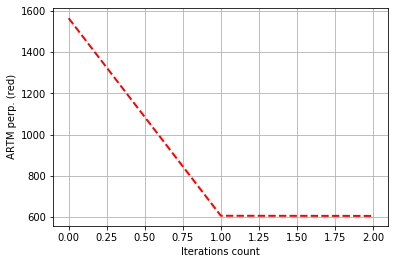

In [0]:
print_measures(model_artm)

In [0]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=['topic_{}'.format(i) for i in range(1, 100)],
                                                            ))
model_artm.regularizers.add(artm.SmoothSparseThetaRegulari
# посмотрим на качество
print_measures(model_artm)zer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=['topic_{}'.format(i) for i in range(1, 100)]))

In [0]:
model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=2)

In [0]:
phi_tau = model_artm.regularizers['SparsePhi'].tau
theta_tau = model_artm.regularizers['SparseTheta'].tau

for i in range(10):
    model_artm.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.5))
    model_artm.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=1)

Sparsity Phi: 0.626 ARTM)
Sparsity Theta: 0.103 (ARTM)
Kernel contrast: 0.312 (ARTM)
Kernel purity: 0.246 (ARTM)
Perplexity: 372.405 (ARTM)


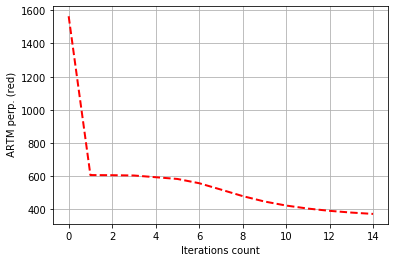

In [0]:
print_measures(model_artm)

Особенно существенные изменения были на первой итерации (что предсказуемо) и между шестой и десятой итерациями. Почему что-то происходило между 10-й и 14=й итерациями, если всего итераций было 10, я не знаю.

Хорошие темы:
- компьтерная безопасность
topic_1: 
безопасность
атака
защита
уязвимость
устройство
информационный
злоумышленник
компания
угроза
сеть

- конференция
topic_8: 
конференция
доклад
тема
рассказать
участник
выступление
презентация
мероприятие
видео
вопрос
- машинное обучение
topic_46: 
обучение
сеть
модель
алгоритм
признак
слой
нейронный
машинный
нейрон
нейросеть

Примечательно, что выделилась отдельная группа слов, значение которых не самодостаточно.
topic_36: 
знать
говорить
какой-то
что-то
человек
вообще
понять
вопрос
идея
пытаться


In [0]:
for topic_name in model_artm.topic_names[:50]:
    print(topic_name + ': ')
    try:
        for x in model_artm.score_tracker['TopTokensScore_1'].last_tokens[topic_name]:
            print(x)
        print('---------')
    
    except KeyError: # можно перекрутить параметры и некоторые темы окажутся пустыми
        continue

topic_0: 
поезд
механизм
дело
имя
народ
дверь
пока
известный
являться
существовать
---------
topic_1: 
безопасность
атака
защита
уязвимость
устройство
информационный
злоумышленник
компания
угроза
сеть
---------
topic_2: 
человек
социальный
дело
сказать
день
книга
говорить
жизнь
вопрос
что-то
---------
topic_3: 
номер
связь
оператор
звонок
участник
результат
процесс
решение
база
количество
---------
topic_4: 
инструкция
регистр
процессор
байт
память
архитектура
программа
битый
битный
компилятор
---------
topic_5: 
–
позволять
процесс
являться
устройство
вид
закрытый
использование
качество
сторона
---------
topic_6: 
пользователь
ваш
иконка
простой
пост
хотеть
любой
статья
интерфейс
навигация
---------
topic_7: 
сервер
диск
резервный
машина
копия
база
виртуальный
кластер
нагрузка
хранение
---------
topic_8: 
конференция
доклад
тема
рассказать
участник
выступление
презентация
мероприятие
видео
вопрос
---------
topic_9: 
программа
слово
говорить
компьютер
глава
хотя
почему
идея
некоторый
к